# Customer Churn Analysis (Insurance Dataset)

**Objective:** Predict which customers are likely to churn (stop renewing policy).  
**Business Impact:** Retaining customers is cheaper than acquiring new ones; predicting churn saves revenue.  
**Dataset:** Insurance Churn dataset from Kaggle  
**Target:** `Churn` (Yes/No)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load csv
df = pd.read_csv("../data/randomdata.csv")
df.head()

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.078640,No,21,Yes
1,1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,1440,14390,0.100069,No,24,Yes
2,2,Christopher Kim,"8693 Walters Mountains,South Tony, TX 88407",Smith-Holmes,Phone,Medium,256,1875,0.136533,No,18,Yes
3,3,Nicole Allen,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell-Perez,Phone,Medium,233,1875,0.124267,No,24,Yes
4,4,Linda Cruz,"489 Thomas Forges Apt. 305,Jesseton, GA 36765","Simpson, Kramer and Hughes",Phone,Medium,239,1875,0.127467,No,21,Yes


In [2]:
# data inspection
df.shape
df.info()
df.describe(include='all').T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   Customer Name         200000 non-null  object 
 2   Customer_Address      200000 non-null  object 
 3   Company Name          200000 non-null  object 
 4   Claim Reason          200000 non-null  object 
 5   Data confidentiality  200000 non-null  object 
 6   Claim Amount          200000 non-null  int64  
 7   Category Premium      200000 non-null  int64  
 8   Premium/Amount Ratio  200000 non-null  float64
 9   Claim Request output  200000 non-null  object 
 10  BMI                   200000 non-null  int64  
 11  Churn                 200000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 18.3+ MB


Unnamed: 0              0
Customer Name           0
Customer_Address        0
Company Name            0
Claim Reason            0
Data confidentiality    0
Claim Amount            0
Category Premium        0
Premium/Amount Ratio    0
Claim Request output    0
BMI                     0
Churn                   0
dtype: int64

In [3]:
# drop irrelevant columns
df = df.drop(columns=['Unnamed: 0', 'Customer Name', 'Customer_Address'])

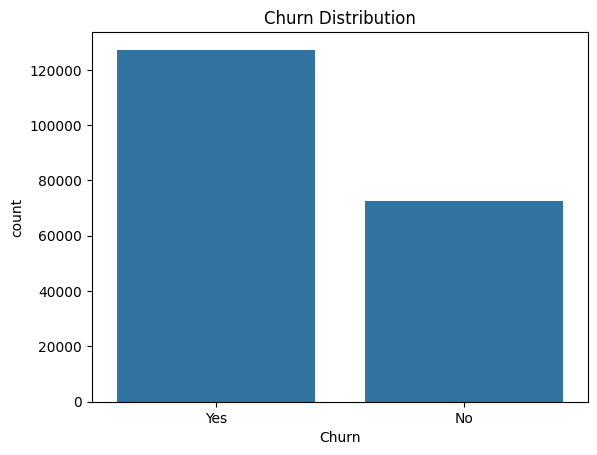

Churn
Yes    63.636
No     36.364
Name: proportion, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize churn counts
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# print percentages
print(df['Churn'].value_counts(normalize=True)*100)

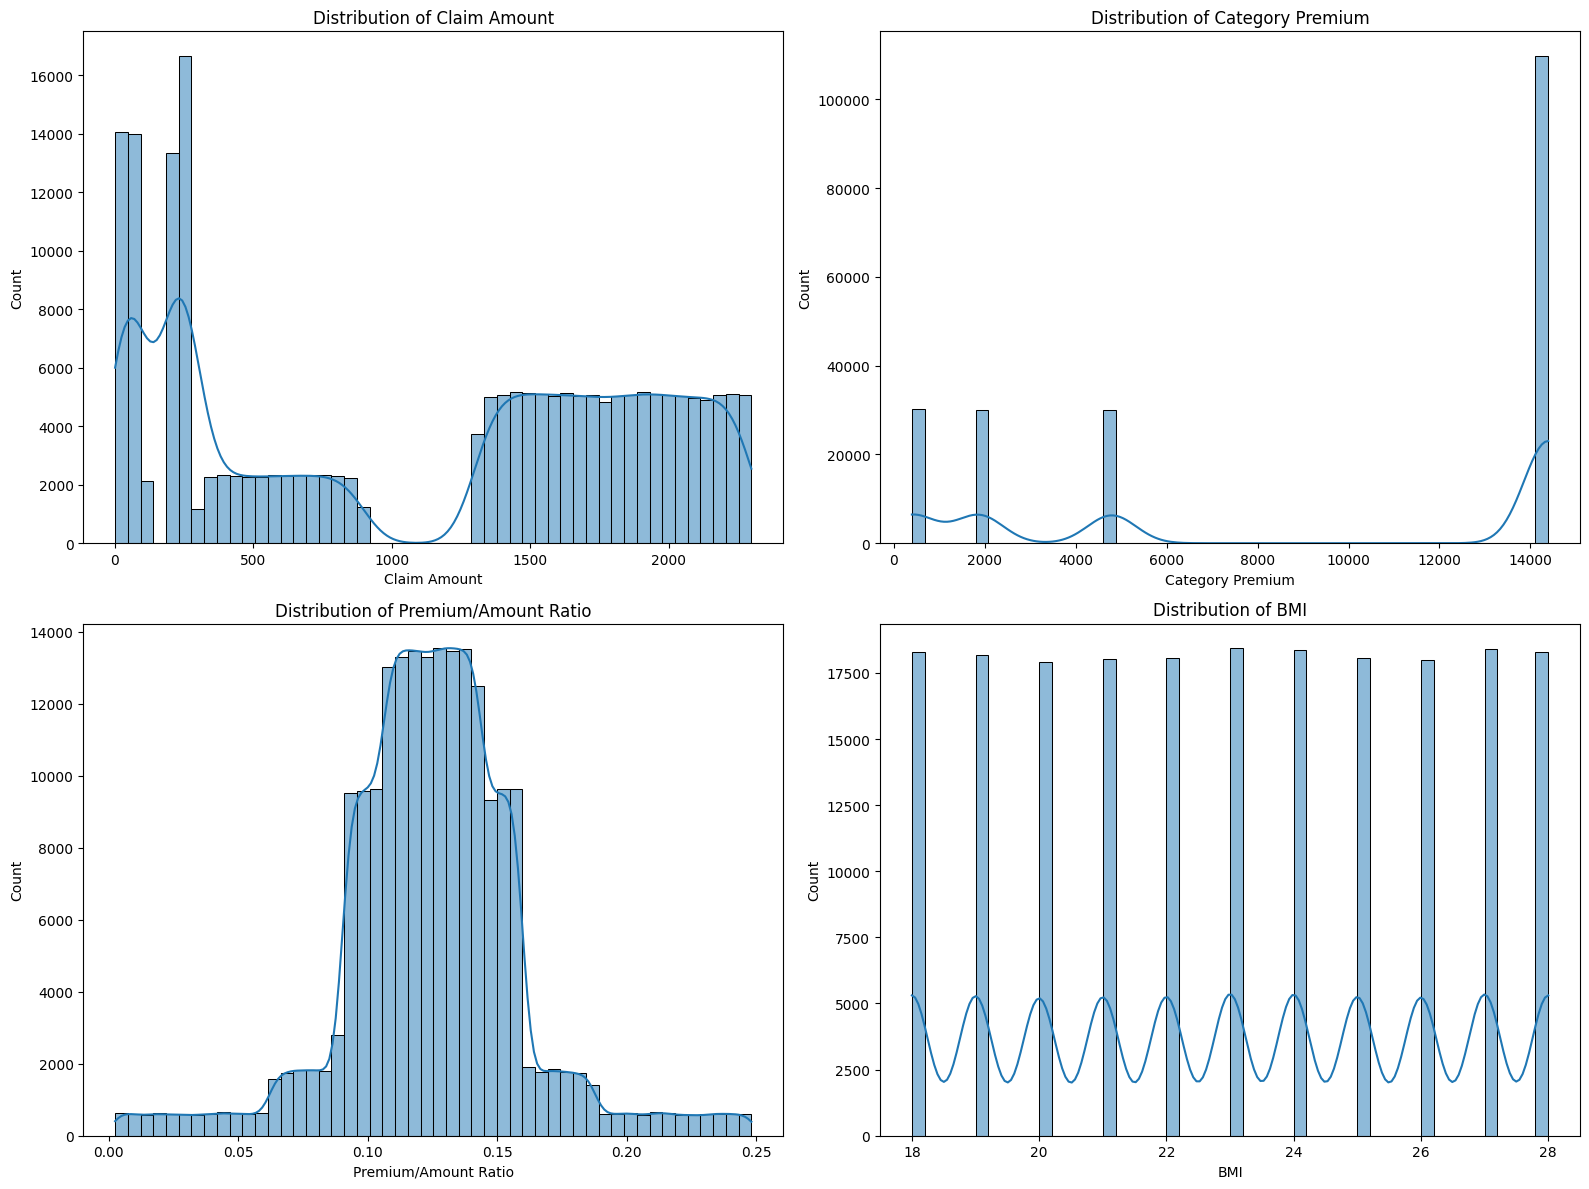

In [6]:
# univariate analysis

# numeric features

num_cols = ['Claim Amount','Category Premium','Premium/Amount Ratio','BMI']

plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

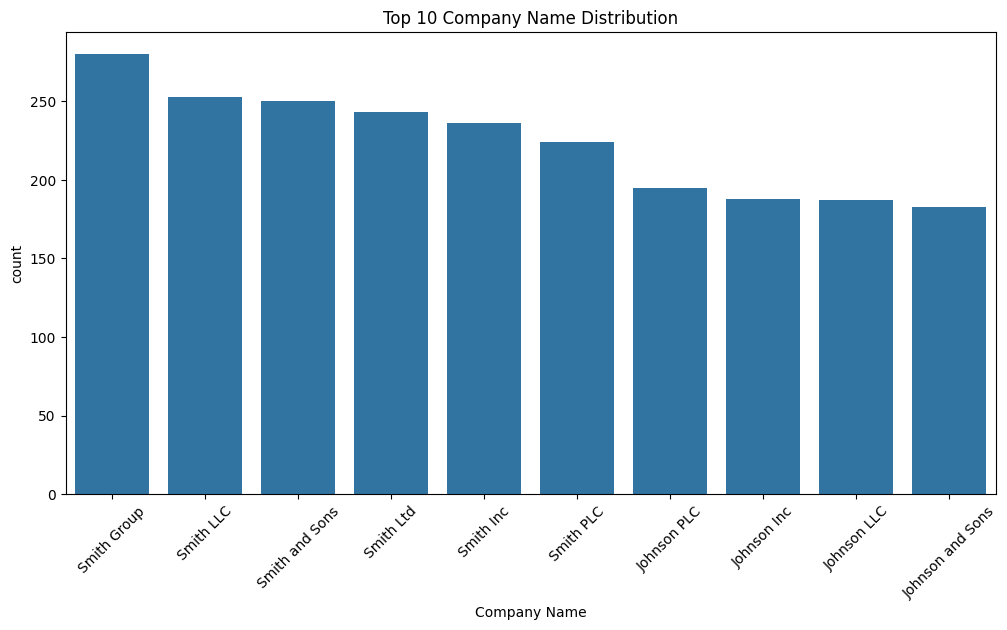

Top 10 Company Name values:
 Company Name
Smith Group         280
Smith LLC           253
Smith and Sons      250
Smith Ltd           243
Smith Inc           236
Smith PLC           224
Johnson PLC         195
Johnson Inc         188
Johnson LLC         187
Johnson and Sons    183
Name: count, dtype: int64 



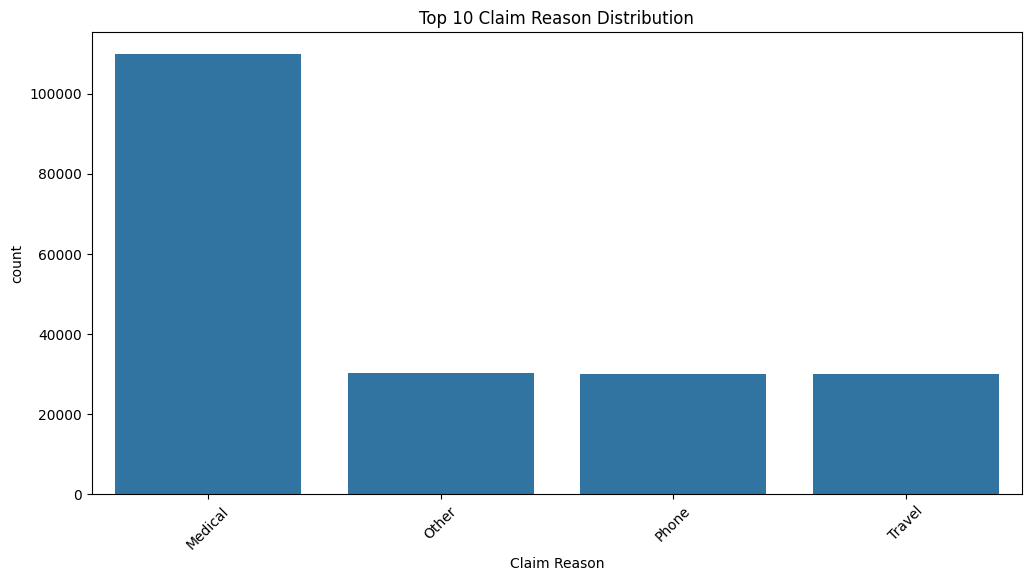

Top 10 Claim Reason values:
 Claim Reason
Medical    109863
Other       30187
Phone       30016
Travel      29934
Name: count, dtype: int64 



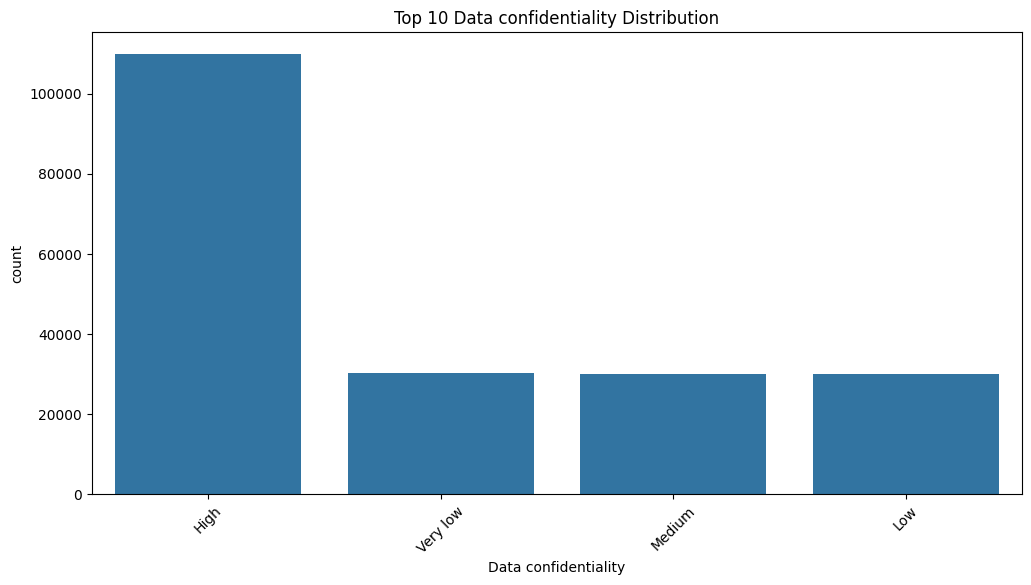

Top 10 Data confidentiality values:
 Data confidentiality
High        109863
Very low     30187
Medium       30016
Low          29934
Name: count, dtype: int64 



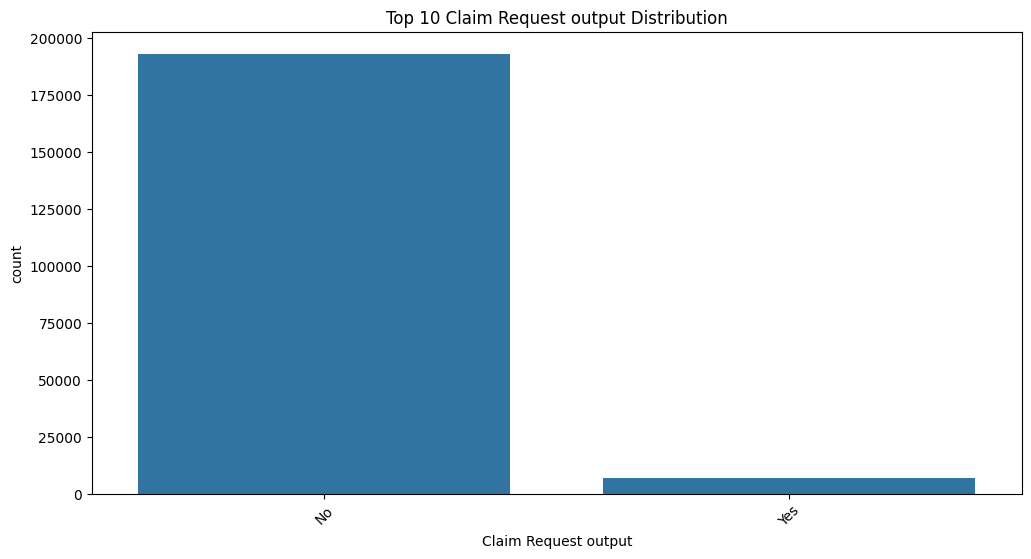

Top 10 Claim Request output values:
 Claim Request output
No     192994
Yes      7006
Name: count, dtype: int64 



In [9]:
cat_cols = ['Company Name','Claim Reason','Data confidentiality','Claim Request output']

for col in cat_cols:
    top_categories = df[col].value_counts().nlargest(10).index
    
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, data=df[df[col].isin(top_categories)], order=top_categories)
    plt.title(f'Top 10 {col} Distribution')
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"Top 10 {col} values:\n", df[col].value_counts().head(10), "\n")

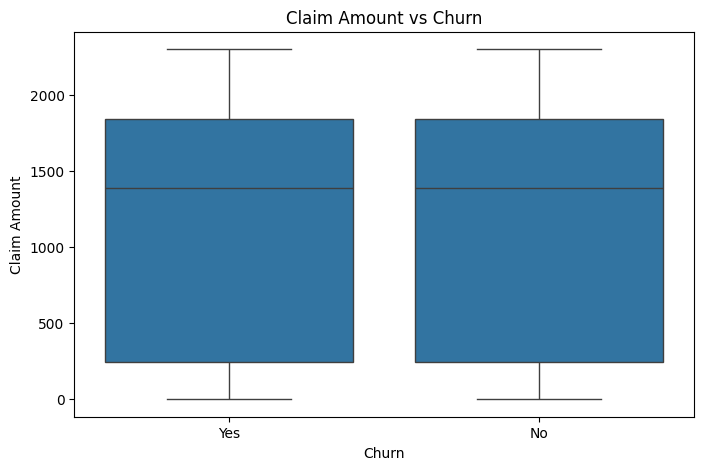

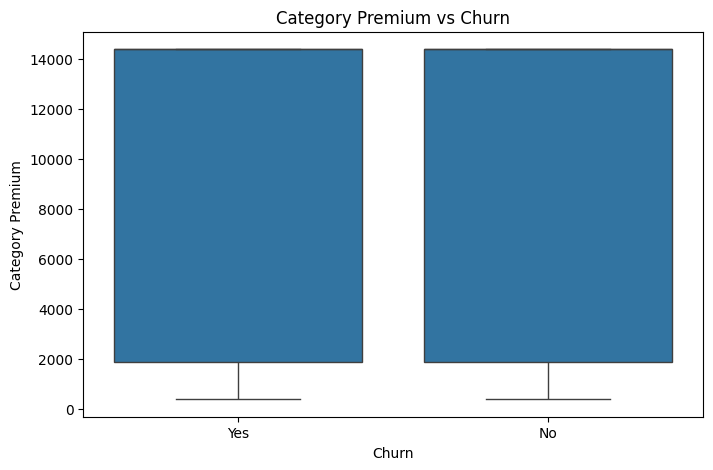

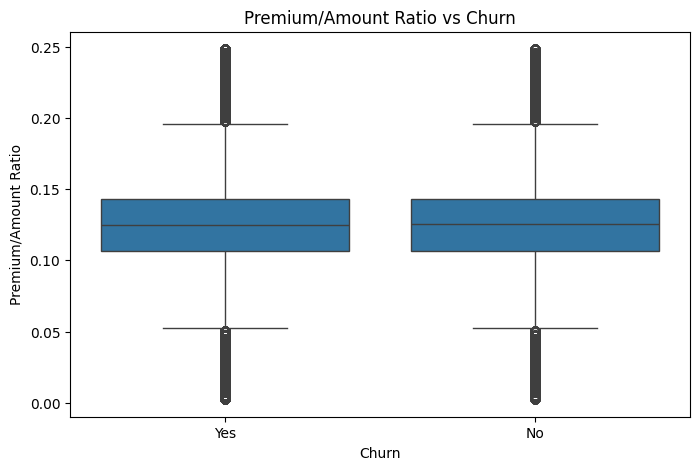

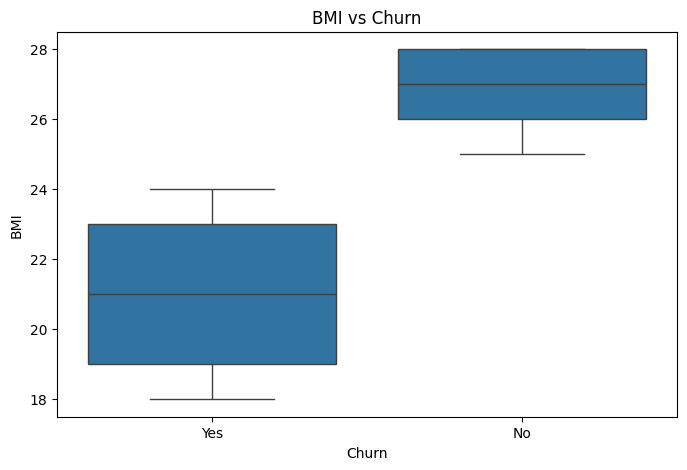

In [10]:
## bivariate analysis (feature vs churn)

## numeric vs churn

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

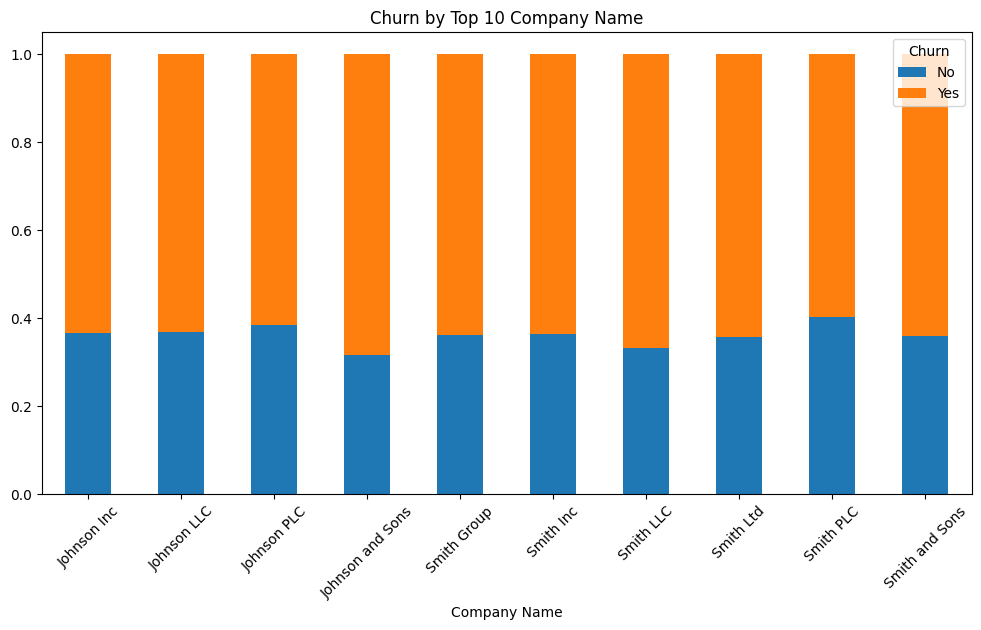

Churn rates for Top 10 Company Name:
 Churn                   No       Yes
Company Name                        
Johnson Inc       0.367021  0.632979
Johnson LLC       0.368984  0.631016
Johnson PLC       0.384615  0.615385
Johnson and Sons  0.316940  0.683060
Smith Group       0.360714  0.639286
Smith Inc         0.364407  0.635593
Smith LLC         0.332016  0.667984
Smith Ltd         0.358025  0.641975
Smith PLC         0.401786  0.598214
Smith and Sons    0.360000  0.640000 



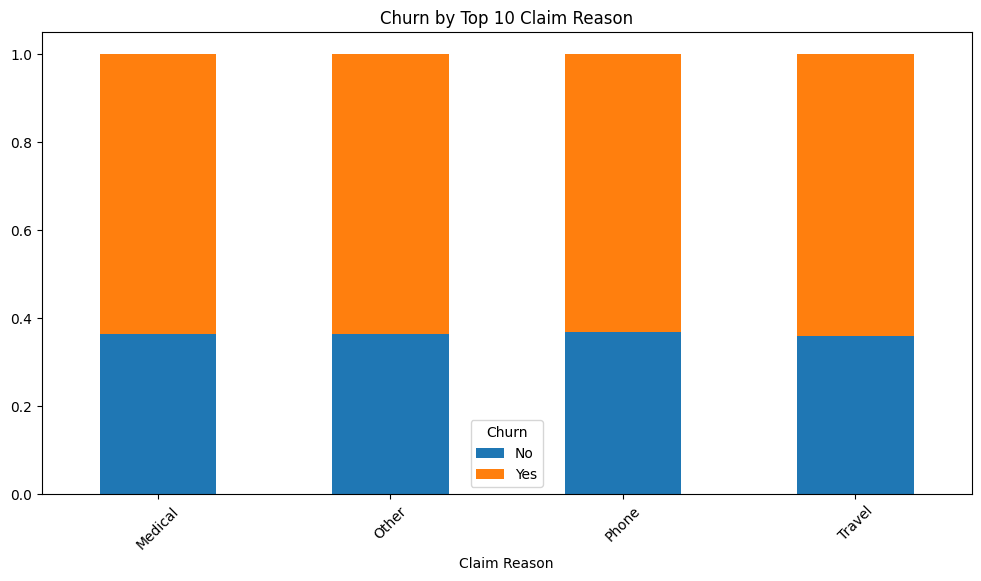

Churn rates for Top 10 Claim Reason:
 Churn               No       Yes
Claim Reason                    
Medical       0.363744  0.636256
Other         0.363865  0.636135
Phone         0.367404  0.632596
Travel        0.359257  0.640743 



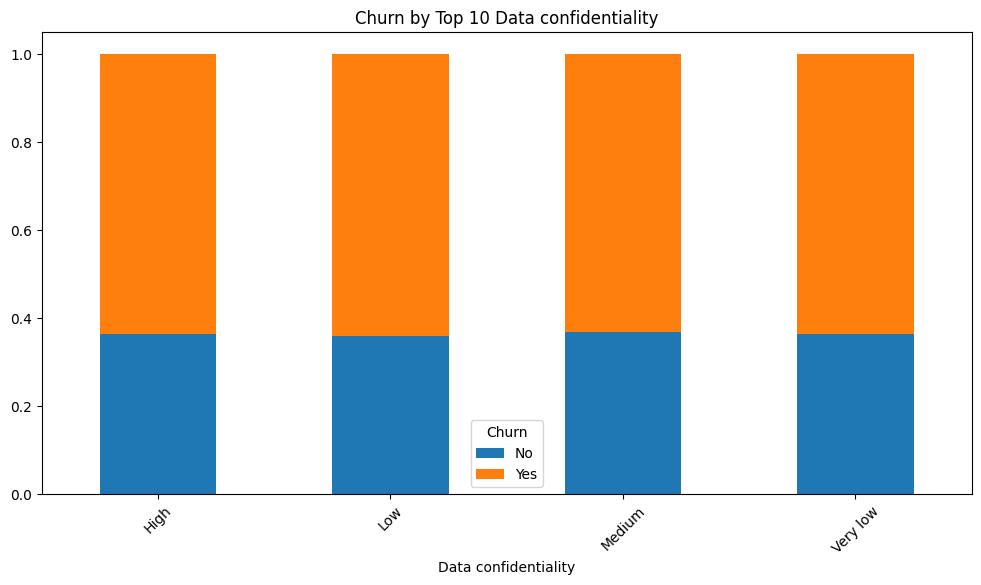

Churn rates for Top 10 Data confidentiality:
 Churn                       No       Yes
Data confidentiality                    
High                  0.363744  0.636256
Low                   0.359257  0.640743
Medium                0.367404  0.632596
Very low              0.363865  0.636135 



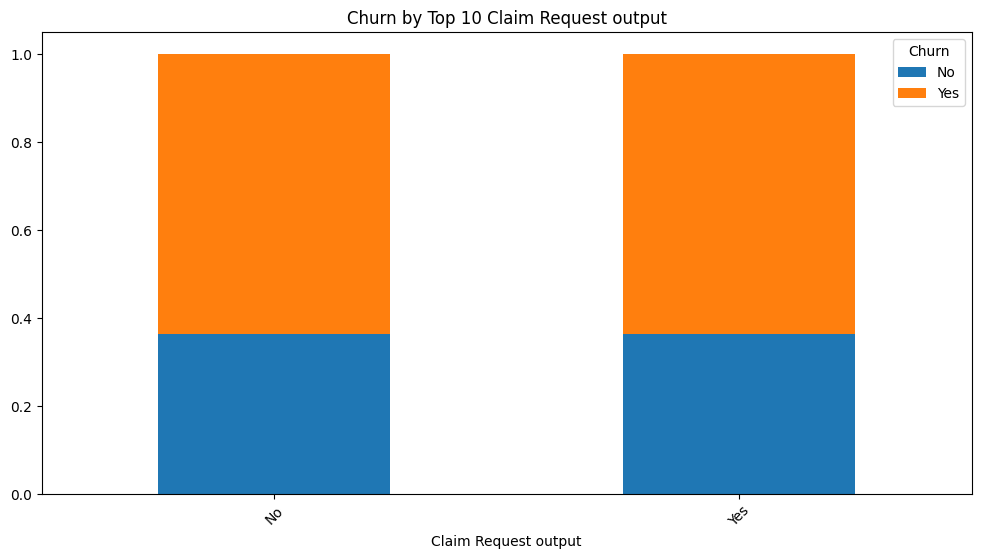

Churn rates for Top 10 Claim Request output:
 Churn                       No       Yes
Claim Request output                    
No                    0.363586  0.636414
Yes                   0.365116  0.634884 



In [12]:
for col in cat_cols:
    # Only top 10 categories
    top_categories = df[col].value_counts().nlargest(10).index
    temp = df[df[col].isin(top_categories)]
    
    churn_rates = temp.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    
    churn_rates.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title(f'Churn by Top 10 {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"Churn rates for Top 10 {col}:\n", churn_rates, "\n")

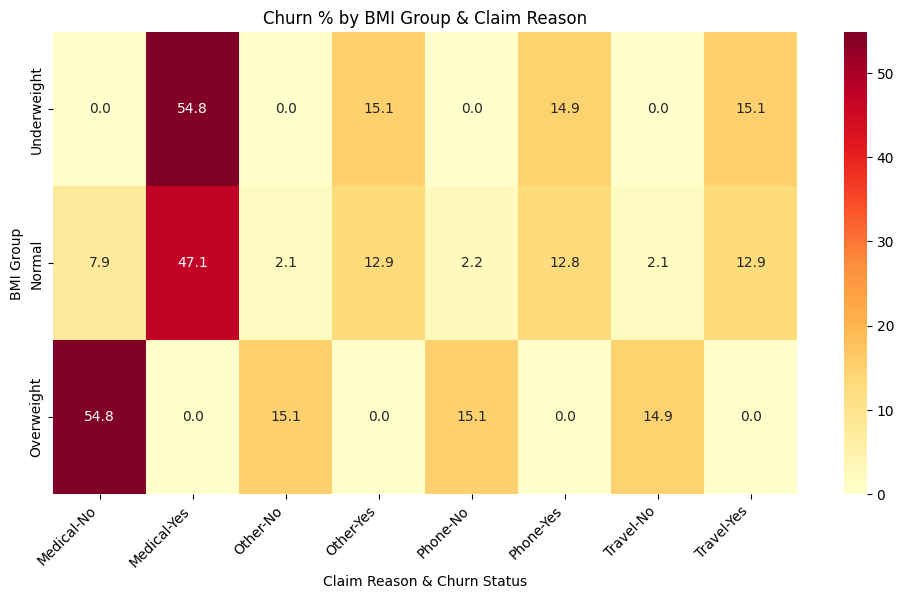

Top 5 BMI + Claim Reason combinations with highest churn %:
 BMI_Group    Claim Reason
Underweight  Medical         54.818783
Normal       Medical         47.129251
Underweight  Travel          15.142404
             Other           15.142404
             Phone           14.896408
dtype: float64


In [14]:
## cross tab analysis with churn


# Create BMI groups
df['BMI_Group'] = pd.cut(df['BMI'], bins=[0,18,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

# Crosstab: BMI_Group x Claim Reason x Churn
ct = pd.crosstab(index=df['BMI_Group'], 
                 columns=[df['Claim Reason'], df['Churn']], 
                 normalize='index') * 100

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title("Churn % by BMI Group & Claim Reason")
plt.ylabel("BMI Group")
plt.xlabel("Claim Reason & Churn Status")
plt.xticks(rotation=45, ha='right')
plt.show()

# Optional: print top-risk combinations
churn_yes = ct.xs('Yes', level=1, axis=1)  # get only 'Yes' churn %
top_risk = churn_yes.stack().sort_values(ascending=False).head(5)
print("Top 5 BMI + Claim Reason combinations with highest churn %:\n", top_risk)


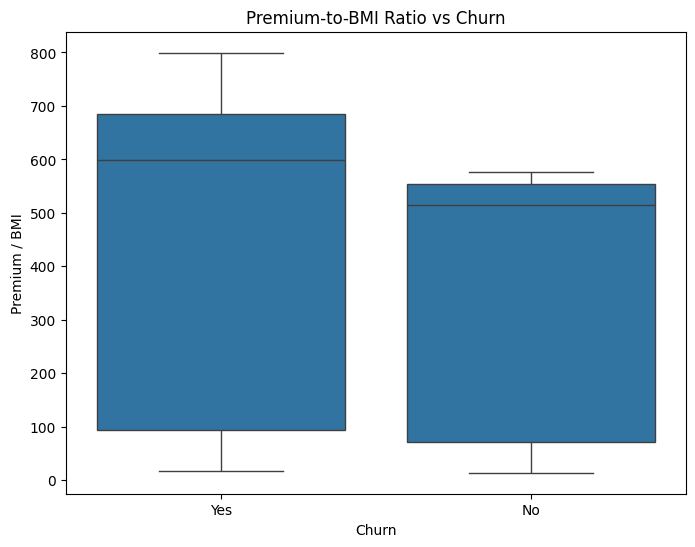

In [15]:
## feature engineering

df['Premium_to_BMI'] = df['Category Premium'] / df['BMI']

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Premium_to_BMI', data=df)
plt.title("Premium-to-BMI Ratio vs Churn")
plt.ylabel("Premium / BMI")
plt.show()

In [18]:
## statistical testing

# Import required libraries
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np
import pandas as pd

#Categorical Features: Chi-Square Test
print("=== CATEGORICAL FEATURES ===\n")
for col in cat_cols:
    ct = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(ct)
    significance = "Significant" if p < 0.05 else "Not Significant"
    print(f"{col}: p-value={p:.4f} ({significance})")

#Numeric Features: t-test
print("\n=== NUMERIC FEATURES ===\n")
numeric_test_cols = num_cols + ['Premium_to_BMI']  # include engineered feature
for col in numeric_test_cols:
    churned = df[df['Churn']=='Yes'][col]
    not_churned = df[df['Churn']=='No'][col]
    t_stat, p = ttest_ind(churned, not_churned, nan_policy='omit')
    mean_diff = churned.mean() - not_churned.mean()
    direction = "higher in churned" if mean_diff > 0 else "higher in non-churned"
    significance = "Significant" if p < 0.05 else "Not Significant"
    print(f"{col}: p-value={p:.4f}, mean_diff={mean_diff:.2f} ({direction}, {significance})")


=== CATEGORICAL FEATURES ===

Company Name: p-value=0.3948 (Not Significant)
Claim Reason: p-value=0.2275 (Not Significant)
Data confidentiality: p-value=0.2275 (Not Significant)
Claim Request output: p-value=0.8036 (Not Significant)

=== NUMERIC FEATURES ===

Claim Amount: p-value=0.8193, mean_diff=0.85 (higher in churned, Not Significant)
Category Premium: p-value=0.8492, mean_diff=5.40 (higher in churned, Not Significant)
Premium/Amount Ratio: p-value=0.7300, mean_diff=0.00 (higher in churned, Not Significant)
BMI: p-value=0.0000, mean_diff=-5.50 (higher in non-churned, Significant)
Premium_to_BMI: p-value=0.0000, mean_diff=91.98 (higher in churned, Significant)


## Key Findings

**1. Churn Imbalance**
- The dataset is heavily imbalanced: ~3-4% of customers have churned, while ~96-97% have not.  
- This indicates that any predictive model will need to handle class imbalance (e.g., using SMOTE).

**2. Numeric Feature Insights**
- **BMI**: Higher BMI is associated with non-churned customers. Lower BMI tends to churn more.  
- **Premium_to_BMI ratio**: This engineered feature is significantly higher in churned customers, making it the strongest predictor in the dataset.  

**3. Categorical Feature Insights**
- **Company Name, Claim Reason, Data Confidentiality, Claim Request Output**: These features were tested using Chi-square and are **not statistically significant** in predicting churn.  

**4. Actionable Insight**
- Feature engineering (like `Premium_to_BMI`) can uncover hidden patterns that raw features may not reveal.  
- These insights provide a strong foundation for building a predictive model and suggesting targeted retention strategies.  

**5. Next Steps**
- Preprocess the data (encoding categorical variables, scaling numeric features).  
- Handle class imbalance using SMOTE.  
- Build predictive models (Logistic Regression, Random Forest, XGBoost).  
- Evaluate models using Precision, Recall, F1-score, and ROC-AUC.  
- Interpret model outputs using feature importance or SHAP to provide actionable business recommendations.